## Imports

In [1060]:
import openml
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import brier_score_loss
# from alive_progress import alive_bar
import json
import warnings
warnings.filterwarnings("ignore")
import copy


# set random seed
np.random.seed(42)
%run functions.py

## Get datasets

In [1061]:
df1, df2, df3, df4 =  get_datasets()

# Dataset 1 - credit g

In [1062]:
# Get data from dataset1
X1, y1, _, _ = df1.get_data(dataset_format="dataframe")
target1 = 'class'
X1.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [1063]:
# do some preprocessing

# replace 'good' and 'bad' with 0 and 1
X1[target1] = np.where(X1[target1] == 'bad', 1, 0)
# remove : from names of columns
X1 = pd.get_dummies(X1)
X1.columns = X1.columns.str.replace(',', '_').str.replace(':', '_').str.replace(';', '_').str.replace('.', '_').str.replace('(', '_').str.replace(')', '_').str.replace(' ', '_').str.replace('<', '_').str.replace('=', '_').str.replace('__', '_')


# print first 5 rows
X1.head(5)

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class,checking_status_0,checking_status_0_X_200,...,housing_own,housing_for_free,job_unemp/unskilled_non_res,job_unskilled_resident,job_skilled,job_high_qualif/self_emp/mgmt,own_telephone_none,own_telephone_yes,foreign_worker_yes,foreign_worker_no
0,6,1169.0,4,4,67,2,1,0,True,False,...,True,False,False,False,True,False,False,True,True,False
1,48,5951.0,2,2,22,1,1,1,False,True,...,True,False,False,False,True,False,True,False,True,False
2,12,2096.0,2,3,49,1,2,0,False,False,...,True,False,False,True,False,False,True,False,True,False
3,42,7882.0,2,4,45,1,2,0,True,False,...,False,True,False,False,True,False,True,False,True,False
4,24,4870.0,3,4,53,2,2,1,True,False,...,False,True,False,False,True,False,True,False,True,False


In [1064]:
# Split data into train and test
X1 = X1[count_correlation_with_target_select_randomly_m_out_of_top_n(X1, target1, 20, 7)]
X1_train, X1_test = train_test_split(X1, stratify=X1[target1], train_size = 500, test_size=500)
X1_train.shape, X1_test.shape

((500, 8), (500, 8))

In [1065]:
X1.head(5)

,checking_status_no_checking,purpose_new_car,employment_1,checking_status_0,credit_history_all_paid,credit_amount,checking_status_0_X_200,class
0,False,False,False,True,False,1169.0,False,0
1,False,False,False,False,False,5951.0,True,1
2,True,False,False,False,False,2096.0,False,0
3,False,False,False,True,False,7882.0,False,0
4,False,True,False,True,False,4870.0,False,1


## Dataset 2 - bank-marketing

In [1066]:
# Get data from dataset2
X2, y2, _, _ = df2.get_data(dataset_format="dataframe")
X2.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month','duration', 'campaign', 'pdays', 'previous', 'poutcome', 'Class']
target2 = 'Class'
X2.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0.0,unknown,1
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0.0,unknown,1
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0.0,unknown,1
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0.0,unknown,1
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0.0,unknown,1


In [1067]:
# do some preprocessing
X2[target2] = X2[target2].astype(int)
X2[target2] = X2[target2] -1
X2 = pd.get_dummies(X2)
# print first 5 rows
X2.head(5)

,age,balance,day,duration,campaign,pdays,previous,Class,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143.0,5,261.0,1,-1.0,0.0,0,False,False,...,False,False,True,False,False,False,False,False,False,True
1,44,29.0,5,151.0,1,-1.0,0.0,0,False,False,...,False,False,True,False,False,False,False,False,False,True
2,33,2.0,5,76.0,1,-1.0,0.0,0,False,False,...,False,False,True,False,False,False,False,False,False,True
3,47,1506.0,5,92.0,1,-1.0,0.0,0,False,True,...,False,False,True,False,False,False,False,False,False,True
4,33,1.0,5,198.0,1,-1.0,0.0,0,False,False,...,False,False,True,False,False,False,False,False,False,True


In [1068]:
# Split data into train and test
X2 = X2[count_correlation_with_target_select_randomly_m_out_of_top_n(X2, target2, 20, 7)]
X2_train, X2_test = train_test_split(X2, stratify=X2[target2], train_size = 500, test_size=1000)
X2_train.shape, X2_test.shape

((500, 8), (1000, 8))

In [1069]:
X2.head(5)

,month_dec,month_mar,loan_no,month_may,contact_cellular,campaign,housing_yes,Class
0,False,False,True,True,False,1,True,0
1,False,False,True,True,False,1,True,0
2,False,False,False,True,False,1,True,0
3,False,False,True,True,False,1,True,0
4,False,False,True,True,False,1,False,0


## Dataset 3 - MagicTelescope

In [1070]:
# Get data from dataset3
X3, y3, _, _ = df3.get_data(dataset_format="dataframe")
target3 = 'class'
X3.head(5)

,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [1071]:
# do some preprocessing

# remove : from names of columns
X3.columns = X3.columns.str.replace(':', '')

# replace g with 1 h with 0 in target column
X3[target3] = X3[target3].replace({'g': 1, 'h': 0})

X3[target3] = X3[target3].astype(int)
# print first 5 rows
X3.head(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [1072]:
# Split data into train and test
X3 = X3[count_correlation_with_target_select_randomly_m_out_of_top_n(X3, target3, 20, 7)]
X3_train, X3_test = train_test_split(X3, stratify=X3[target3], train_size = 500, test_size=1000)
X3_train.head(5)

,fAsym,fDist,fM3Trans,fM3Long,fAlpha,fLength,fWidth,class
15194,-112.7360,271.8750,65.3261,-34.9512,56.2950,73.9242,56.4758,0
18330,-179.8195,337.0055,-38.1600,-246.5407,41.5958,246.5385,57.6978,0
8566,-32.5940,163.7120,6.2599,-33.4038,5.3885,54.6176,15.0295,1
4217,-14.2318,166.2750,-10.6024,-12.6480,59.4230,21.4890,12.3798,1
7792,25.8320,233.1590,-4.1581,4.0307,26.9970,19.2975,9.9982,1


In [1073]:
X3.head(5)

,fAsym,fDist,fM3Trans,fM3Long,fAlpha,fLength,fWidth,class
0,27.7004,81.8828,-8.2027,22.0110,40.0920,28.7967,16.0021,1
1,26.2722,205.2610,-9.9574,23.8238,6.3609,31.6036,11.7235,1
2,116.7410,256.7880,-45.2160,-64.8580,76.9600,162.0520,136.0310,1
3,27.2107,116.7370,-7.1513,-6.4633,10.4490,23.8172,9.5728,1
4,-5.5277,356.4620,21.8393,28.5525,4.6480,75.1362,30.9205,1


# Dataset 4 - Titanic

In [1074]:
# Get data from dataset1
X4, y4, _, _ = df4.get_data(dataset_format="dataframe")
target4 = 'survived'
X4.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [1075]:
# do some preprocessing

X4 = X4.drop(['cabin', 'boat', 'body', 'home.dest', 'name', 'ticket'], axis=1)
X4 = X4.dropna()
# change target column to int
X4[target4] = X4[target4].astype(int)
# dummy encoding
X4 = pd.get_dummies(X4)
# print first 5 rows
X4.head(5)

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,True,False,False,False,True
1,1,1,0.9167,1,2,151.5500,False,True,False,False,True
2,1,0,2.0000,1,2,151.5500,True,False,False,False,True
3,1,0,30.0000,1,2,151.5500,False,True,False,False,True
4,1,0,25.0000,1,2,151.5500,True,False,False,False,True


In [1076]:
# Split data into train and test
X4 = X4[count_correlation_with_target_select_randomly_m_out_of_top_n(X4, target4, 20, 7)]
X4_train, X4_test = train_test_split(X4, stratify=X4[target4], train_size = 500, test_size=len(X4)-500)
X4_train.head(5)

,embarked_Q,sex_male,embarked_C,parch,age,sex_female,fare,survived
770,False,True,False,0,36.0,False,7.2500,0
892,False,True,False,0,31.0,False,7.7750,0
414,False,True,False,0,34.0,False,21.0000,0
880,False,True,True,0,29.0,False,7.8958,1
1298,False,True,False,0,36.0,False,9.5000,0


In [1077]:
X4.head(5)  

,embarked_Q,sex_male,embarked_C,parch,age,sex_female,fare,survived
0,False,False,False,0,29.0000,True,211.3375,1
1,False,True,False,2,0.9167,False,151.5500,1
2,False,False,False,2,2.0000,True,151.5500,0
3,False,True,False,2,30.0000,False,151.5500,0
4,False,False,False,2,25.0000,True,151.5500,0


## Notes:

* AUC, accuracy and Brier score - metrics to consider while evaluating the models
* random forest, xgboost, lgbm

In [1078]:
best_AUC_history['lgbm'] = []
best_AUC_history['rfc'] = []
best_AUC_history['lgbm'].append(0)
best_AUC_history

{'lgbm': [0], 'rfc': [], 'xgb': []}

In [1079]:
model_types = ['lgbm', 'rfc', 'xgb']
datasets = [[X1_train, X1_test, target1, "credit_g"], [X2_train, X2_test, target2, "bank-marketing"], [X3_train, X3_test, target3, "MagicTelescope"], [X4_train, X4_test, target4, "Titanic"]]
warnings.filterwarnings("ignore", category=UserWarning, message="num_threads is set with n_jobs=-1, nthread=4 will be ignored.")

columns = ['Dataset', 'Model', 'Hyperparameters', 'ID', 'Metric', 'Value']
df = pd.DataFrame(columns=columns)
from tqdm.notebook import tqdm




# model_types = ['lgbm', 'xgb', ]

AUC_history = dict.fromkeys(model_types, np.array([]))
accuracy_history = dict.fromkeys(model_types, np.array([]))
brier_history = dict.fromkeys(model_types, np.array([]) )

ITERATIONS = 200

for model_type in model_types:
    print(f"Training {model_type} models ...")
    # with alive_bar(1000) as bar:
    for i in tqdm(range(ITERATIONS)):
        hyperparameters = uniform_search(model_type)
        for dataset in datasets:
            X_train = dataset[0]
            # print(X_train.shape)
            X_test = dataset[1]
            target = dataset[2]
            dataset = dataset[3]
            y_train = X_train[target]
            y_test = X_test[target]

            X_train = X_train.drop([target], axis=1)
            X_test = X_test.drop([target], axis=1)

            # print(X_train.columns)
            
            model = train_model(X_train, y_train, model_type, hyperparameters)
            y_pred_proba = model.predict_proba(X_test)[:,1]
            y_pred = model.predict(X_test)
            # print(len(y_pred_proba), len(y_pred), len(y_test))
            auc = roc_auc_score(y_test, y_pred_proba)
            accuracy = accuracy_score(y_test, y_pred)
            brier = brier_score_loss(y_test, y_pred_proba)
            row = pd.DataFrame.from_dict({
                'Dataset': dataset,
                'Model': model_type,
                'Hyperparameters': [hyperparameters],
                'ID': i,
                'Search': 'Uniform',
                'Metric': 'AUC',
                'Value': auc
            })
            row2 = pd.DataFrame.from_dict({
                'Dataset': dataset,
                'Model': model_type,
                'Hyperparameters': [hyperparameters],
                'ID': i,
                'Search': 'Uniform',
                'Metric': 'Accuracy',
                'Value': accuracy
            })
            row3 = pd.DataFrame.from_dict({
                'Dataset': dataset,
                'Model': model_type,
                'Hyperparameters': [hyperparameters],
                'ID': i,
                'Search': 'Uniform',
                'Metric': 'Brier',
                'Value': brier
            })
            
            AUC_history[model_type] = np.append(AUC_history[model_type], auc)
            accuracy_history[model_type] = np.append(accuracy_history[model_type], accuracy)
            brier_history[model_type] = np.append(brier_history[model_type], brier)

            # df = df.append(row, ignore_index=True)
            # df = df.append(row2, ignore_index=True)
            # df = df.append(row3, ignore_index=True)
            df = pd.concat([df, row, row2, row3], ignore_index=True)
            
            
            
if ITERATIONS == 200:
    df.to_pickle('data/results_random_search.pkl')



Training lgbm models ...


  0%|          | 0/200 [00:00<?, ?it/s]

Training rfc models ...


  0%|          | 0/200 [00:00<?, ?it/s]

Training xgb models ...


  0%|          | 0/200 [00:00<?, ?it/s]

In [1080]:
metrics_history = {'AUC': AUC_history, 'Accuracy': accuracy_history, 'Brier': brier_history}

In [1081]:
%run functions.py
save = False
if ITERATIONS == 200:
    save = True
create_and_save_best_defaults_dict(
    df, 
    # ['lgbm'],
    model_types, 
    metrics=['AUC', 'Accuracy', 'Brier'], 
    aggregation_metric = 'AUC',
    save=save
    )

Selecting best defaults for ['lgbm', 'rfc', 'xgb'] by AUC


{'lgbm': ({'n_estimators': 461,
   'max_depth': 6,
   'learning_rate': 0.020997940641181385,
   'subsample': 0.8340480910424313,
   'min_child_weight': 5,
   'num_leaves': 4,
   'reg_alpha': 1.2683167745409016,
   'reg_lambda': 9.599077378039295},
  {'AUC': {'credit_g': 0.7408,
    'bank-marketing': 0.6568177638392814,
    'MagicTelescope': 0.8604995265151514,
    'Titanic': 0.8331483094910205},
   'Accuracy': {'credit_g': 0.72,
    'bank-marketing': 0.883,
    'MagicTelescope': 0.821,
    'Titanic': 0.7697974217311234},
   'Brier': {'credit_g': 0.18052918319273423,
    'bank-marketing': 0.09963649943775783,
    'MagicTelescope': 0.13285273951059576,
    'Titanic': 0.1595723595274648}}),
 'rfc': ({'n_estimators': 352,
   'max_depth': 3,
   'min_samples_split': 9,
   'min_samples_leaf': 1,
   'max_features': 0.5546548068068401},
  {'AUC': {'credit_g': 0.7398285714285715,
    'bank-marketing': 0.6672329180822952,
    'MagicTelescope': 0.8533928696689113,
    'Titanic': 0.8425634467833957

In [1082]:
# save X1_train, X1_test, X2_train, X2_test, X3_train, X3_test, X4_train, X4_test to csv
X1_train.to_csv('data/exported/X1_train.csv')
X1_test.to_csv('data/exported/X1_test.csv')
X2_train.to_csv('data/exported/X2_train.csv')
X2_test.to_csv('data/exported/X2_test.csv')
X3_train.to_csv('data/exported/X3_train.csv')
X3_test.to_csv('data/exported/X3_test.csv')
X4_train.to_csv('data/exported/X4_train.csv')
X4_test.to_csv('data/exported/X4_test.csv')


## Make DF for convergence plots

In [1083]:
# make df from metrics_history
df_history = pd.DataFrame.from_dict(metrics_history)
df_history

,AUC,Accuracy,Brier
lgbm,"[0.7127619047619048, 0.6387364365846813, 0.842...","[0.712, 0.883, 0.809, 0.7679558011049724, 0.71...","[0.18527876565096954, 0.10095778890459783, 0.1..."
rfc,"[0.7252285714285714, 0.6397721443021556, 0.855...","[0.716, 0.883, 0.812, 0.7790055248618785, 0.73...","[0.18352121059909615, 0.10063985500080137, 0.1..."
xgb,"[0.7246666666666668, 0.6593828343545218, 0.848...","[0.71, 0.883, 0.798, 0.7624309392265194, 0.712...","[0.19147945656078164, 0.0990462775349034, 0.14..."


In [1084]:
temp = pd.DataFrame()
index = 0
datasets_str = ['credit_g', 'bank-marketing', 'MagicTelescope', 'Titanic']
for model_type in model_types:
    for metric in metrics_history.keys():
        # print (df_history.loc[model_type, metric])\
        temp_arr = df_history.loc[model_type, metric]
        for i in range (len (temp_arr)):
            dataset_str = datasets_str[i%4]
            iteration_no = i//4 + 1
            indices_dataset = range(i%4, len(temp_arr), 4)
            temp_arr_dataset = temp_arr[indices_dataset]
            if metric!='Brier':
                row = pd.DataFrame({
                    'Dataset': dataset_str,
                    'Iteration': iteration_no,
                    'Model': model_type,
                    'Metric': metric,
                    'Value': np.max(temp_arr_dataset[0:i+1])
                }, index=[index])
            else:
                row = pd.DataFrame({
                    'Dataset': dataset_str,
                    'Iteration': iteration_no,
                    'Model': model_type,
                    'Metric': metric,
                    'Value': np.min(temp_arr_dataset[0:i+1])
                }, index=[index])
            index += 1
            temp = pd.concat([temp, row], ignore_index=True)
        



KeyboardInterrupt: 

In [ ]:
# temp for AUC lgbm
temp[(temp['Metric']=='AUC')&(temp['Model']=='lgbm')&(temp['Dataset']=='credit_g')]

,Dataset,Iteration,Model,Metric,Value
0,credit_g,1,lgbm,AUC,0.712762
4,credit_g,2,lgbm,AUC,0.730990
8,credit_g,3,lgbm,AUC,0.730990
12,credit_g,4,lgbm,AUC,0.730990
16,credit_g,5,lgbm,AUC,0.730990
20,credit_g,6,lgbm,AUC,0.730990
24,credit_g,7,lgbm,AUC,0.730990
28,credit_g,8,lgbm,AUC,0.730990
32,credit_g,9,lgbm,AUC,0.730990
36,credit_g,10,lgbm,AUC,0.730990


## Make convergence plots

            Dataset  Iteration Model Metric     Value
0          credit_g          1  lgbm    AUC  0.712762
1    bank-marketing          1  lgbm    AUC  0.638736
2    MagicTelescope          1  lgbm    AUC  0.858641
3           Titanic          1  lgbm    AUC  0.839142
4          credit_g          2  lgbm    AUC  0.730990
..              ...        ...   ...    ...       ...
275         Titanic          9   xgb    AUC  0.835924
276        credit_g         10   xgb    AUC  0.736657
277  bank-marketing         10   xgb    AUC  0.665137
278  MagicTelescope         10   xgb    AUC  0.853847
279         Titanic         10   xgb    AUC  0.835924

[120 rows x 5 columns]
(30, 5) (30, 5) (30, 5) (30, 5)


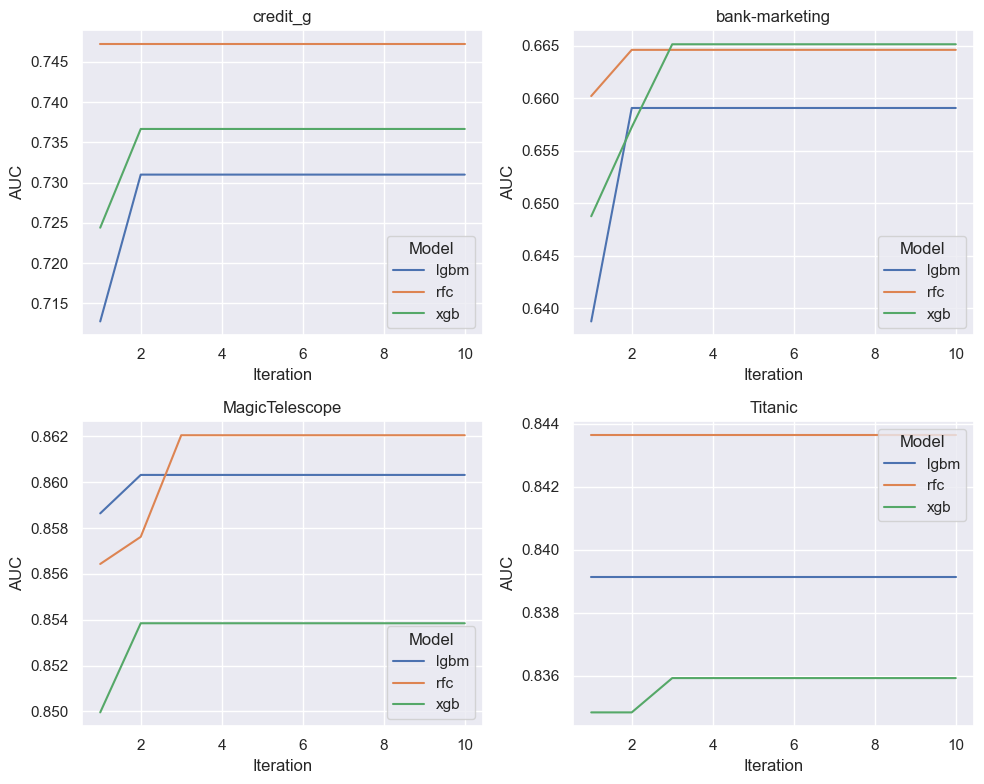

            Dataset  Iteration Model    Metric     Value
40         credit_g          1  lgbm  Accuracy  0.712000
41   bank-marketing          1  lgbm  Accuracy  0.883000
42   MagicTelescope          1  lgbm  Accuracy  0.820000
43          Titanic          1  lgbm  Accuracy  0.767956
44         credit_g          2  lgbm  Accuracy  0.712000
..              ...        ...   ...       ...       ...
315         Titanic          9   xgb  Accuracy  0.784530
316        credit_g         10   xgb  Accuracy  0.722000
317  bank-marketing         10   xgb  Accuracy  0.883000
318  MagicTelescope         10   xgb  Accuracy  0.819000
319         Titanic         10   xgb  Accuracy  0.784530

[120 rows x 5 columns]
(30, 5) (30, 5) (30, 5) (30, 5)


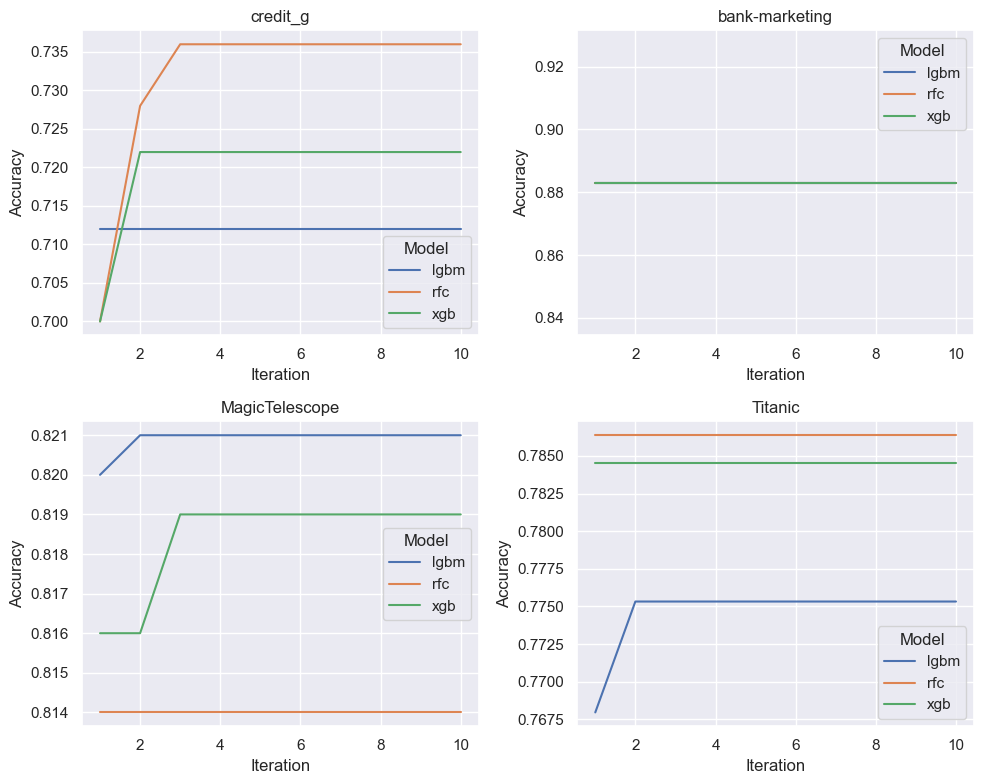

            Dataset  Iteration Model Metric     Value
80         credit_g          1  lgbm  Brier  0.185279
81   bank-marketing          1  lgbm  Brier  0.100666
82   MagicTelescope          1  lgbm  Brier  0.134163
83          Titanic          1  lgbm  Brier  0.160499
84         credit_g          2  lgbm  Brier  0.181845
..              ...        ...   ...    ...       ...
355         Titanic          9   xgb  Brier  0.160153
356        credit_g         10   xgb  Brier  0.180930
357  bank-marketing         10   xgb  Brier  0.099237
358  MagicTelescope         10   xgb  Brier  0.140883
359         Titanic         10   xgb  Brier  0.160153

[120 rows x 5 columns]
(30, 5) (30, 5) (30, 5) (30, 5)


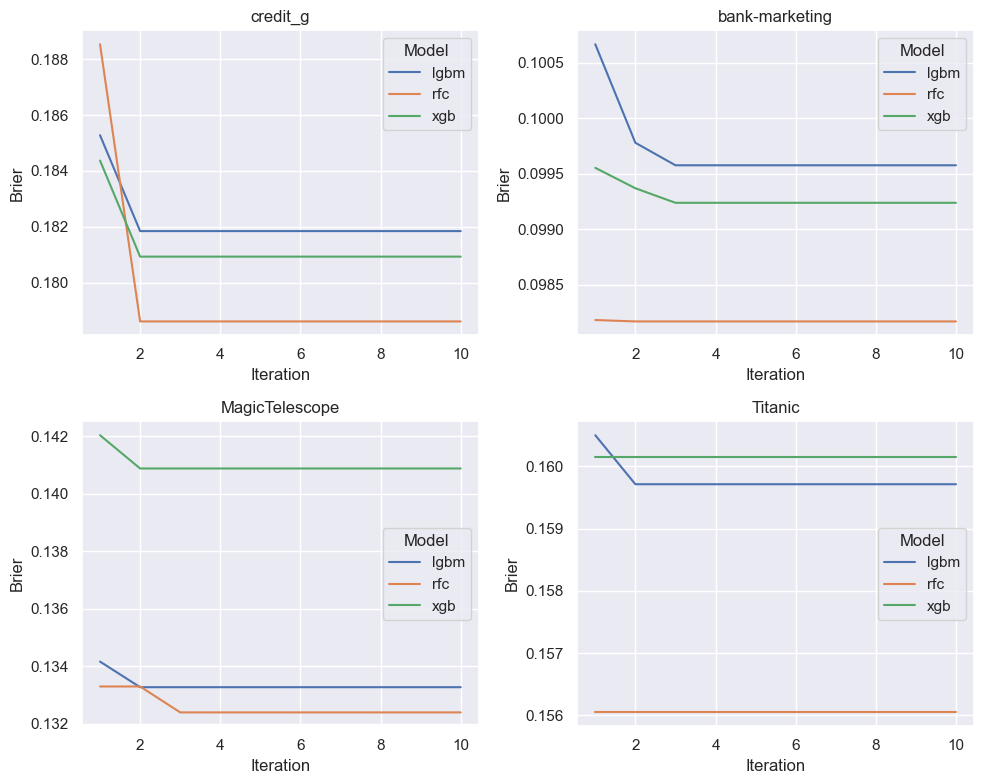

In [ ]:
# plot history of metrics grouped by model type as lines from temp

import matplotlib.pyplot as plt
import seaborn as sns

datasets  = ['credit_g', 'bank-marketing', 'MagicTelescope', 'Titanic']

for metric in ['AUC', 'Accuracy', 'Brier']:
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    temp2 = temp[temp['Metric'] == metric]
    print(temp2)
    # 4 plots 2x2
    temp_credit = temp2[temp2['Dataset'] == 'credit_g']
    temp_bank = temp2[temp2['Dataset'] == 'bank-marketing']
    temp_magic = temp2[temp2['Dataset'] == 'MagicTelescope']
    temp_titanic = temp2[temp2['Dataset'] == 'Titanic']
    print(temp_credit.shape, temp_bank.shape, temp_magic.shape, temp_titanic.shape)
    

    plt.rcParams['figure.figsize'] = [8, 6]
    sns.lineplot(data=temp_credit, x='Iteration', y='Value', hue='Model', ax=axs[0, 0])
    # set titles
    axs[0, 0].set_title('credit_g')
    axs[0, 0].set_xlabel('Iteration')
    axs[0, 0].set_ylabel(metric)
   


    sns.lineplot(data=temp_bank, x='Iteration', y='Value', hue='Model', ax=axs[0, 1])
    # set titles
    axs[0, 1].set_title('bank-marketing')
    axs[0, 1].set_xlabel('Iteration')
    axs[0, 1].set_ylabel(metric)
    


    sns.lineplot(data=temp_magic, x='Iteration', y='Value', hue='Model', ax=axs[1, 0])
    # set titles
    axs[1, 0].set_title('MagicTelescope')
    axs[1, 0].set_xlabel('Iteration')
    axs[1, 0].set_ylabel(metric)
    


    sns.lineplot(data=temp_titanic, x='Iteration', y='Value', hue='Model', ax=axs[1, 1])
    # set titles
    axs[1, 1].set_title('Titanic')
    axs[1, 1].set_xlabel('Iteration')
    axs[1, 1].set_ylabel(metric)
    

    plt.tight_layout()
    

    # save figure
    plt.savefig(f'plots/{metric}_history_random_search.png')
    plt.show()
  

        

In [ ]:
metrics_history

{'AUC': {'lgbm': array([0.7127619 , 0.63873644, 0.84268466, 0.82774514, 0.7183619 ,
         0.63873644, 0.85509172, 0.83286023, 0.72955238, 0.65906825,
         0.85864066, 0.82945252, 0.71586667, 0.63873644, 0.85638065,
         0.83914168, 0.73099048, 0.64651876, 0.86031759, 0.82827914,
         0.71969524, 0.63873644, 0.85525174, 0.83293752, 0.71192381,
         0.63873644, 0.85102764, 0.82801917, 0.72200952, 0.65648866,
         0.85579975, 0.83470813, 0.71919048, 0.65444628, 0.83302864,
         0.83061887, 0.71271429, 0.63873644, 0.84857253, 0.83182738]),
  'rfc': array([0.74717143, 0.64935486, 0.81022464, 0.8371111 , 0.73966667,
         0.66020559, 0.84507839, 0.83780669, 0.7260381 , 0.63678602,
         0.85643326, 0.8376732 , 0.73732381, 0.66460493, 0.85761697,
         0.84363143, 0.7412    , 0.65868107, 0.84723318, 0.84033613,
         0.73093333, 0.6541075 , 0.84041369, 0.83688626, 0.74472381,
         0.65385583, 0.84743704, 0.84238779, 0.72122857, 0.65967806,
         0